<a href="https://colab.research.google.com/github/feliciakiani/PolitikPedia/blob/main/Machine%20Learning/Text_classification_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install tensorflow

In [ ]:
#import dataset
from google.colab import files
uploaded = files.upload()

Saving preprocessed_indonesian_toxic_tweet.csv to preprocessed_indonesian_toxic_tweet.csv


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

#splitting data
data = pd.read_csv('preprocessed_indonesian_toxic_tweet.csv')

# Assuming the columns are named as per your specification
columns = [
    'tweet', 'label_HS', 'label_Abusive', 'label_HS_Individual', 'label_HS_Group',
    'label_HS_Religion', 'label_HS_Race', 'label_HS_Physical', 'label_HS_Gender',
    'label_HS_Other', 'label_HS_Weak', 'label_HS_Moderate', 'label_HS_Strong'
]

# Rename columns for clarity
data.columns = columns

# Assuming 'sentence' is the column containing preprocessed sentences
X = data['tweet']

# Assuming other columns are labels
y = data.drop('tweet', axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create new DataFrames for training and testing data
train_data = pd.DataFrame({'text': X_train})
train_data = pd.concat([train_data, y_train], axis=1)

test_data = pd.DataFrame({'text': X_test})
test_data = pd.concat([test_data, y_test], axis=1)

# Save the training and testing DataFrames to CSV
#train_data.to_csv('/content/drive/MyDrive/training_data.csv', index=False)
#test_data.to_csv('/content/drive/MyDrive/test_data.csv', index=False)

Mounted at /content/drive


In [ ]:
# Print information about the training and testing datasets
print("\nShape of the training dataset:", train_data.shape)
print("Shape of the testing dataset:", test_data.shape)



Shape of the training dataset: (10535, 13)
Shape of the testing dataset: (2634, 13)


In [ ]:
print(train_data.head(15))

                                                    text  label_HS  \
12017  xf0 x9f x93 x8c himmler rupa pimpin divisi scr...         0   
3315                                           iya anjir         0   
6454   teman kelas cakap imut sombong banget teman or...         0   
12776  bicara orientasi studi kenal kampus orientasi ...         0   
9055                                         bajing line         0   
7700            kenal menge i orang bajing sepe hati asa         0   
12976  acara back to kampus fakultas ilmu budaya univ...         0   
3                                ku tau mata sipit lihat         0   
5527           otoriter label pulang pulang tinggal nama         1   
7180                             sepe i lihat punuk onta         0   
6092   asing bajing surat pemberitahuan ahok bese a k...         1   
10762  biar panas alias babi kaaaaau wkwk canda mamah...         0   
4341   guncang dengar ulama zaman usaha hindar orang ...         0   
3693   main pos rond

In [ ]:
#optional if u want to download the data
from google.colab import files

# Assuming the paths to the training and testing CSV files
training_data_path = '/content/drive/MyDrive/training_data.csv'
test_data_path = '/content/drive/MyDrive/test_data.csv'

# Download the training dataset
files.download(training_data_path)

# Download the testing dataset
files.download(test_data_path)


In [ ]:
import csv

def parse_data_from_file(file_path):
    sentences = []
    labels_HS = []
    labels_Abusive = []
    labels_HS_Individual = []
    labels_HS_Group = []
    labels_HS_Religion = []
    labels_HS_Race = []
    labels_HS_Physical = []
    labels_HS_Gender = []
    labels_HS_Other = []
    labels_HS_Weak = []
    labels_HS_Moderate = []
    labels_HS_Strong = []

    with open(file_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader, None)  # Skip the header

        for row in reader:
            sentence = row[0]
            label_HS = int(row[1])
            label_Abusive = int(row[2])
            label_HS_Individual = int(row[3])
            label_HS_Group = int(row[4])
            label_HS_Religion = int(row[5])
            label_HS_Race = int(row[6])
            label_HS_Physical = int(row[7])
            label_HS_Gender = int(row[8])
            label_HS_Other = int(row[9])
            label_HS_Weak = int(row[10])
            label_HS_Moderate = int(row[11])
            label_HS_Strong = int(row[12])

            # Append data to respective lists
            sentences.append(sentence)
            labels_HS.append(label_HS)
            labels_Abusive.append(label_Abusive)
            labels_HS_Individual.append(label_HS_Individual)
            labels_HS_Group.append(label_HS_Group)
            labels_HS_Religion.append(label_HS_Religion)
            labels_HS_Race.append(label_HS_Race)
            labels_HS_Physical.append(label_HS_Physical)
            labels_HS_Gender.append(label_HS_Gender)
            labels_HS_Other.append(label_HS_Other)
            labels_HS_Weak.append(label_HS_Weak)
            labels_HS_Moderate.append(label_HS_Moderate)
            labels_HS_Strong.append(label_HS_Strong)

    return (sentences, labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
            labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender,
            labels_HS_Other, labels_HS_Weak, labels_HS_Moderate, labels_HS_Strong)


In [ ]:
#Training data
sentences, labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group, labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender, labels_HS_Other, labels_HS_Weak, labels_HS_Moderate, labels_HS_Strong = parse_data_from_file('/content/drive/MyDrive/training_data.csv')

#test data
test_sentences, test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender, test_labels_HS_Other, test_labels_HS_Weak, test_labels_HS_Moderate, test_labels_HS_Strong = parse_data_from_file('/content/drive/MyDrive/test_data.csv')

This is a small model that predict only labels_hs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(sentences)
X_test_vectorized = vectorizer.transform(test_sentences)

# Step 2: Choose and train the classification model
model = LogisticRegression()
model.fit(X_train_vectorized, labels_HS)  # Assuming you're training for 'labels_HS'

# Step 3: Make predictions on the test data
predictions = model.predict(X_test_vectorized)

# Step 4: Evaluate the model
accuracy = accuracy_score(test_labels_HS, predictions)
report = classification_report(test_labels_HS, predictions)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.8356112376613516
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1516
           1       0.83      0.77      0.80      1118

    accuracy                           0.84      2634
   macro avg       0.84      0.83      0.83      2634
weighted avg       0.84      0.84      0.83      2634



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training using deep learning method 12 labels failed


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Convert labels to numpy arrays
y_train = np.array([labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
                    labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender,
                    labels_HS_Other, labels_HS_Weak, labels_HS_Moderate, labels_HS_Strong])

y_test = np.array([test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,
                   test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender,
                   test_labels_HS_Other, test_labels_HS_Weak, test_labels_HS_Moderate, test_labels_HS_Strong])

# Tokenize the sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)

X_train = tokenizer.texts_to_sequences(sentences)
X_test = tokenizer.texts_to_sequences(test_sentences)

# Pad sequences to ensure consistent length
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post')
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post')

In [ ]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X_train_padded.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(12, activation='sigmoid'))  # 12 is the number of output labels

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train.T, epochs=30, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test.T)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/30
132/132 [==============================] - 26s 133ms/step - loss: 0.5501 - accuracy: 0.2792 - val_loss: 0.4093 - val_accuracy: 0.8723
Epoch 2/30
132/132 [==============================] - 8s 62ms/step - loss: 0.4199 - accuracy: 0.4280 - val_loss: 0.4016 - val_accuracy: 0.8723
Epoch 3/30
132/132 [==============================] - 5s 39ms/step - loss: 0.4085 - accuracy: 0.4776 - val_loss: 0.4008 - val_accuracy: 0.8723
Epoch 4/30
132/132 [==============================] - 6s 44ms/step - loss: 0.4039 - accuracy: 0.5276 - val_loss: 0.3986 - val_accuracy: 0.8723
Epoch 5/30
132/132 [==============================] - 5s 36ms/step - loss: 0.4007 - accuracy: 0.5631 - val_loss: 0.3943 - val_accuracy: 0.6260
Epoch 6/30
132/132 [==============================] - 4s 30ms/step - loss: 0.3900 - accuracy: 0.5742 - val_loss: 0.3768 - val_accuracy: 0.6118
Epoch 7/30
132/132 [==============================] - 4s 30ms/step - loss: 0.3565 - accuracy: 0.5841 - val_loss: 0.3432 - val_accuracy: 0.72

8 labels :

In [ ]:
import numpy as np
import tensorflow as tf
# Convert labels to numpy arrays
y_train = np.array([labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
                    labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender])

y_test = np.array([test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,
                   test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender])

# Tokenize the sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)

X_train = tokenizer.texts_to_sequences(sentences)
X_test = tokenizer.texts_to_sequences(test_sentences)

# Pad sequences to ensure consistent length
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post')
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post')

Version 1 test accuracy 87%

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True, verbose=1)

# Define a more complex model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256, input_length=X_train_padded.shape[1]))
model.add(SpatialDropout1D(0.6))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(SpatialDropout1D(0.6))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='sigmoid'))

# Compile the model with an adjusted learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train_padded, y_train.T, epochs=30, batch_size=128, validation_split=0.2, callbacks=[model_checkpoint, early_stopping])

# Load the best weights from the checkpoint
model.load_weights('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test.T)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/30
66/66 [==============================] - ETA: 0s - loss: 0.6896 - accuracy: 0.1178
Epoch 1: val_loss improved from inf to 0.68793, saving model to best_model.h5
66/66 [==============================] - 27s 173ms/step - loss: 0.6896 - accuracy: 0.1178 - val_loss: 0.6879 - val_accuracy: 0.1149
Epoch 2/30
 1/66 [..............................] - ETA: 2s - loss: 0.6867 - accuracy: 0.0938

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 [==============================] - ETA: 0s - loss: 0.6820 - accuracy: 0.1175
Epoch 2: val_loss improved from 0.68793 to 0.67785, saving model to best_model.h5
66/66 [==============================] - 6s 85ms/step - loss: 0.6820 - accuracy: 0.1175 - val_loss: 0.6779 - val_accuracy: 0.1277
Epoch 3/30
66/66 [==============================] - ETA: 0s - loss: 0.6677 - accuracy: 0.1168
Epoch 3: val_loss improved from 0.67785 to 0.65614, saving model to best_model.h5
66/66 [==============================] - 7s 102ms/step - loss: 0.6677 - accuracy: 0.1168 - val_loss: 0.6561 - val_accuracy: 0.1277
Epoch 4/30
66/66 [==============================] - ETA: 0s - loss: 0.6355 - accuracy: 0.1232
Epoch 4: val_loss improved from 0.65614 to 0.60304, saving model to best_model.h5
66/66 [==============================] - 5s 71ms/step - loss: 0.6355 - accuracy: 0.1232 - val_loss: 0.6030 - val_accuracy: 0.1277
Epoch 5/30
66/66 [==============================] - ETA: 0s - loss: 0.5680 - accuracy: 0.132

Version 2 coba2

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True, verbose=1)

# Define a more complex model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256, input_length=X_train_padded.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(SpatialDropout1D(0.6))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='sigmoid'))

# Compile the model with an adjusted learning rate
model.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train_padded, y_train.T, epochs=30, batch_size=64, validation_split=0.2, callbacks=[model_checkpoint, early_stopping])

# Load the best weights from the checkpoint
model.load_weights('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test.T)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/30
132/132 [==============================] - ETA: 0s - loss: 0.4624 - accuracy: 0.4586
Epoch 1: val_loss improved from inf to 0.38016, saving model to best_model.h5
132/132 [==============================] - 26s 122ms/step - loss: 0.4624 - accuracy: 0.4586 - val_loss: 0.3802 - val_accuracy: 0.8723
Epoch 2/30
132/132 [==============================] - ETA: 0s - loss: 0.3904 - accuracy: 0.5284
Epoch 2: val_loss improved from 0.38016 to 0.37698, saving model to best_model.h5
132/132 [==============================] - 6s 48ms/step - loss: 0.3904 - accuracy: 0.5284 - val_loss: 0.3770 - val_accuracy: 0.5700
Epoch 3/30
132/132 [==============================] - ETA: 0s - loss: 0.3677 - accuracy: 0.5929
Epoch 3: val_loss improved from 0.37698 to 0.33904, saving model to best_model.h5
132/132 [==============================] - 7s 57ms/step - loss: 0.3677 - accuracy: 0.5929 - val_loss: 0.3390 - val_accuracy: 0.6991
Epoch 4/30
132/132 [==============================] - ETA: 0s - loss: 0.

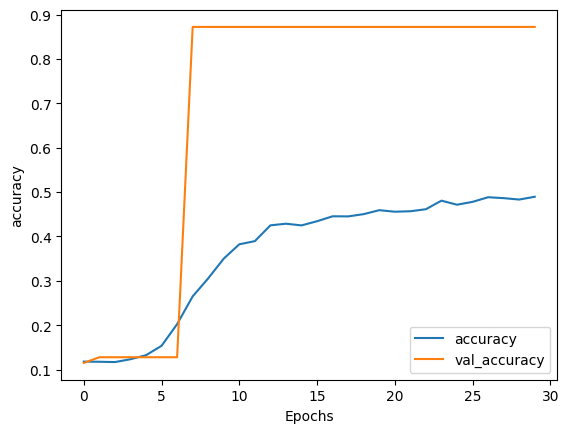

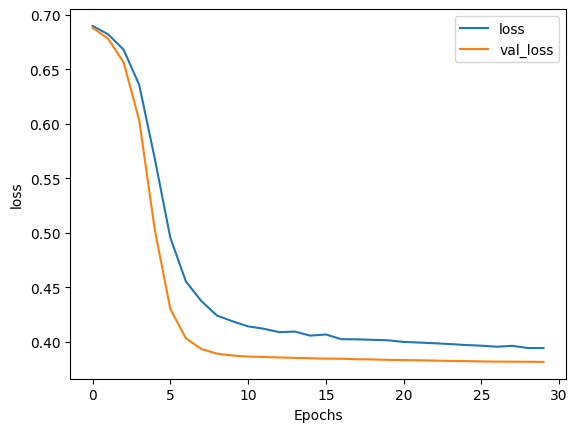

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 106, 256)          3019520   
                                                                 
 spatial_dropout1d (Spatial  (None, 106, 256)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 106, 256)          394240    
 al)                                                             
                                                                 
 spatial_dropout1d_1 (Spati  (None, 106, 256)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                  

In [ ]:
import matplotlib.pyplot as plt

def show_model_summary(model):
    """
    Display the summary of the model's architecture and parameters.

    Args:
        model (tf.keras.models.Sequential): Keras sequential model.

    Returns:
        None
    """
    model.summary()

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Call the function with your model
show_model_summary(model)

In [ ]:
# Assuming you have already loaded and preprocessed your test data and model as mentioned before
training_labels_multi = np.column_stack((labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group, labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender))
testing_labels_multi = np.column_stack((test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender))

# Assuming you have already loaded and preprocessed your test data and model as mentioned before

# Make predictions
predictions = model.predict(X_test_padded)

# Convert the predictions to class labels (multi-label classification)
threshold = 0.5
predicted_labels_multi = (predictions > threshold).astype(int)

# Display the first 5 samples
for i in range(5):
    print(f"\nSample {i + 1}")
    print(f"Sentence: {test_sentences[i]}")
    print(f"Actual Labels: {testing_labels_multi[i]}")
    print(f"Predicted Probabilities: {predictions[i]}")
    print(f"Predicted Labels: {predicted_labels_multi[i]}")

# You can also compare them element-wise
for i in range(5):
    print(f"\nComparison for Sample {i + 1}")
    print(f"Sentence: {test_sentences[i]}")
    print(f"Actual Labels: {testing_labels_multi[i]}")
    print(f"Predicted Labels: {predicted_labels_multi[i]}")
    print(f"Correct Predictions: {np.array_equal(testing_labels_multi[i], predicted_labels_multi[i])}")



ValueError: ignored

In [ ]:
model.save('my_model.h5')

from google.colab import files

files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>